In [1]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

from keras import backend as K

import tensorboard
import matplotlib.pyplot as plt

import numpy as np

2022-11-02 00:37:17.561370: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-02 00:37:17.615869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-02 00:37:17.615880: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Question 1

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0

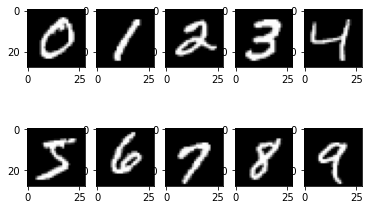

In [3]:
fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels == i)[0]
    plottable_image = np.reshape(train_images[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray')

In [4]:
print(train_labels[100])

tf.keras.utils.to_categorical(train_labels)[100]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Model 1

In [5]:
# Sequential Model
model1 = keras.models.Sequential([
        keras.Input(shape=(28,28,1)),
        keras.layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(12, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(24, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(28, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(36, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(40, kernel_size=(3, 3), activation="relu"),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax"),
])



model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 8)         296       
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 12)        876       
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 16)        1744      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 20)        2900      
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 24)        4344      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 28)        6

2022-11-01 21:34:01.094425: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-01 21:34:01.094484: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alberto-Inspiron): /proc/driver/nvidia/version does not exist
2022-11-01 21:34:01.095718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [91]:
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

K.set_value(model1.optimizer.learning_rate, 0.0005)


In [92]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model1.fit(
    train_images,
    train_labels, 
    batch_size=32,
    epochs=5, 
    callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0612 - accuracy: 0.9813
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0583 - accuracy: 0.9815
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0567 - accuracy: 0.9827
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0541 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0522 - accuracy: 0.9840


#### Results

#### I will summarize the results based on the optimizer method

##### Adam:
For this method I tried different combinations of batch size and learning rate. These were the results:

##### learning rate = 0.001

batch_size = 32, epochs = 5 : Test loss: 6.490649223327637 ---- Test accuracy: 0.9702000021934509

batch_size = 64, epochs = 5 : Test loss: 9.572504997253418 ---- Test accuracy: 0.9664000272750854


##### learning rate = 0.0005

batch_size = 32, epochs = 5 : Test loss: 194.7186737060547 Test accuracy: 0.13249999284744263

batch_size = 64, epochs = 5 : Test loss: 185.1067657470703 ---- Test accuracy: 0.14560000598430634


##### SGD:
For this method I tried different combinations of batch size and learning rate. These were the results:

##### learning rate = 0.001

batch_size = 32, epochs = 5 : Test loss: 209.14405822753906 ---- Test accuracy: 0.1467999964952469

batch_size = 64, epochs = 5 : Test loss: 184.36209106445312 ---- Test accuracy: 0.13920000195503235


##### learning rate = 0.0005

batch_size = 32, epochs = 5 : Test loss: 159.16867065429688 ---- Test accuracy: 0.1468999981880188

batch_size = 64, epochs = 5 : Test loss: 187.08892822265625 ---- Test accuracy: 0.15070000290870667


##### RMSProp:
For this method I tried different combinations of batch size and learning rate. These were the results:

##### learning rate = 0.001

batch_size = 32, epochs = 5 : Test loss: 810.2504272460938 ---- Test accuracy: 0.15449999272823334

batch_size = 64, epochs = 5 : Test loss: 1778.3662109375 ---- Test accuracy: 0.1468999981880188


##### learning rate = 0.0005

batch_size = 32, epochs = 5 : Test loss: 2353.105712890625 ---- Test accuracy: 0.14659999310970306

batch_size = 64, epochs = 5 : Test loss: 2807.159423828125 ---- Test accuracy: 0.15719999372959137



In [93]:
# Evaluate
score = model1.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 2335.8582 - accuracy: 0.1546
Test loss: 2335.858154296875
Test accuracy: 0.15459999442100525


#### Final Observations

### Model 2

In [44]:
# Sequential Model
model2 = keras.models.Sequential([
        keras.Input(shape=(28,28,1)),
        keras.layers.Conv2D(40, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(36, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(28, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(24, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(12, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax"),
])


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 40)        400       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 36)        12996     
                                                                 
 conv2d_12 (Conv2D)          (None, 22, 22, 32)        10400     
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 28)        8092      
                                                                 
 conv2d_14 (Conv2D)          (None, 18, 18, 24)        6072      
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 20)        4340      
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 16)       

In [81]:
model2.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

K.set_value(model2.optimizer.learning_rate, 0.0005)


In [82]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model2.fit(
    train_images,
    train_labels, 
    batch_size=64,
    epochs=5, 
    callbacks=[tensorboard_callback])

Epoch 1/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0063 - accuracy: 0.9984
Epoch 2/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 3/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0034 - accuracy: 0.9991
Epoch 4/5
938/938 [==============================] - 40s 42ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 5/5
938/938 [==============================] - 44s 46ms/step - loss: 0.0037 - accuracy: 0.9992


#### Observations

#### I will summarize the results based on the optimizer method

##### Adam:
For this method I tried different combinations of batch size and learning rate. These were the results:

##### learning rate = 0.001

batch_size = 32, epochs = 5 : Test loss: 6.4124321937561035 ---- Test accuracy: 0.9718999862670898

batch_size = 64, epochs = 5 : Test loss: 8.255528450012207 ---- Test accuracy: 0.9638000130653381


##### learning rate = 0.0005

batch_size = 32, epochs = 5 : Test loss: 16.019819259643555 ---- Test accuracy: 0.9602000117301941

batch_size = 64, epochs = 5 : Test loss: 14.98194408416748 ---- Test accuracy: 0.9707000255584717


##### SGD:
For this method I tried different combinations of batch size and learning rate. These were the results:

##### learning rate = 0.001

batch_size = 32, epochs = 5 : Test loss: 11.841575622558594 ---- Test accuracy: 0.979200005531311

batch_size = 64, epochs = 5 : Test loss: 12.16141414642334 ---- Test accuracy: 0.979200005531311


##### learning rate = 0.0005

batch_size = 32, epochs = 5 : Test loss: 12.396894454956055 ---- Test accuracy: 0.9793000221252441

batch_size = 64, epochs = 5 : Test loss: 12.465036392211914 ---- Test accuracy: 0.979200005531311


##### RMSProp:
For this method I tried different combinations of batch size and learning rate. These were the results:

##### learning rate = 0.001

batch_size = 32, epochs = 5 : Test loss: 15.826443672180176 ---- Test accuracy: 0.9598000049591064

batch_size = 64, epochs = 5 : Test loss: 36.027587890625 ---- Test accuracy: 0.9584000110626221


##### learning rate = 0.0005

batch_size = 32, epochs = 5 : Test loss: 37.842185974121094 ---- Test accuracy: 0.9768000245094299

batch_size = 64, epochs = 5 : Test loss: 37.7193717956543 ---- Test accuracy: 0.9805999994277954

In [83]:
# Evaluate
score = model2.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 13ms/step - loss: 37.7194 - accuracy: 0.9806
Test loss: 37.7193717956543
Test accuracy: 0.9805999994277954


#### Final Observations

### Model 3

In [84]:
# Sequential Model
model3 = keras.models.Sequential([
        keras.Input(shape=(28,28,1)),
        keras.layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(12, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(24, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(12, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax"),
])



model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 4)         40        
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 8)         296       
                                                                 
 conv2d_22 (Conv2D)          (None, 22, 22, 12)        876       
                                                                 
 conv2d_23 (Conv2D)          (None, 20, 20, 16)        1744      
                                                                 
 conv2d_24 (Conv2D)          (None, 18, 18, 20)        2900      
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 24)        4344      
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 20)       

In [121]:
model3.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

K.set_value(model3.optimizer.learning_rate, 0.0005)

In [122]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model3.fit(
    train_images,
    train_labels, 
    batch_size=64,
    epochs=5, 
    callbacks=[tensorboard_callback])

Epoch 1/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0060 - accuracy: 0.9984
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0044 - accuracy: 0.9990
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0042 - accuracy: 0.9990
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0044 - accuracy: 0.9990


#### Observations

#### I will summarize the results based on the optimizer method

##### Adam:
For this method I tried different combinations of batch size and learning rate. These were the results:

##### learning rate = 0.001

batch_size = 32, epochs = 5 : Test loss: 7.333022594451904 ---- Test accuracy: 0.9681000113487244

batch_size = 64, epochs = 5 : Test loss: 18.73436164855957 ---- Test accuracy: 0.9402999877929688


##### learning rate = 0.0005

batch_size = 32, epochs = 5 : Test loss: 13.888640403747559 ---- Test accuracy: 0.9501000046730042

batch_size = 64, epochs = 5 : Test loss: 18.489398956298828 ---- Test accuracy: 0.9591000080108643


##### SGD:
For this method I tried different combinations of batch size and learning rate. These were the results:

##### learning rate = 0.001

batch_size = 32, epochs = 5 : Test loss: 15.506414413452148 ---- Test accuracy: 0.968500018119812

batch_size = 64, epochs = 5 : Test loss: 15.83298397064209 ---- Test accuracy: 0.9690999984741211


##### learning rate = 0.0005

batch_size = 32, epochs = 5 : Test loss: 16.004711151123047 ---- Test accuracy: 0.9693999886512756

batch_size = 64, epochs = 5 : Test loss: 16.097017288208008 ---- Test accuracy: 0.9696000218391418


##### RMSProp:
For this method I tried different combinations of batch size and learning rate. These were the results:

##### learning rate = 0.001

batch_size = 32, epochs = 5 : Test loss: 54.20248794555664 ---- Test accuracy: 0.8810999989509583

batch_size = 64, epochs = 5 : Test loss: 36.41796875 ---- Test accuracy: 0.9447000026702881


##### learning rate = 0.0005

batch_size = 32, epochs = 5 : Test loss: 69.07653045654297 ---- Test accuracy: 0.9448000192642212

batch_size = 64, epochs = 5 : Test loss: 76.99116516113281 ---- Test accuracy: 0.9491000175476074

In [123]:
# Evaluate
score = model3.evaluate(test_images, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 76.9912 - accuracy: 0.9491
Test loss: 76.99116516113281
Test accuracy: 0.9491000175476074


#### Final Observations

# Question 2

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

x_train = x_train / 255.0
tf.keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=84, activation='relu'))
model.add(keras.layers.Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

2022-11-02 00:37:53.366119: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-02 00:37:53.366170: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alberto-Inspiron): /proc/driver/nvidia/version does not exist
2022-11-02 00:37:53.368606: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

K.set_value(model.optimizer.learning_rate, 0.001)

In [15]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model.
model.fit(
    x_train,
    y_train, 
    batch_size=128,
    epochs=25, 
    callbacks=[tensorboard_callback])

Epoch 1/25
391/391 [==============================] - 2s 5ms/step - loss: 0.4771 - accuracy: 0.8305
Epoch 2/25
391/391 [==============================] - 2s 6ms/step - loss: 0.4701 - accuracy: 0.8345
Epoch 3/25
391/391 [==============================] - 2s 6ms/step - loss: 0.4692 - accuracy: 0.8341
Epoch 4/25
391/391 [==============================] - 3s 7ms/step - loss: 0.4683 - accuracy: 0.8333
Epoch 5/25
391/391 [==============================] - 3s 7ms/step - loss: 0.4645 - accuracy: 0.8336
Epoch 6/25
391/391 [==============================] - 3s 7ms/step - loss: 0.4683 - accuracy: 0.8325
Epoch 7/25
391/391 [==============================] - 3s 7ms/step - loss: 0.4594 - accuracy: 0.8348
Epoch 8/25
391/391 [==============================] - 3s 7ms/step - loss: 0.4571 - accuracy: 0.8361
Epoch 9/25
391/391 [==============================] - 3s 7ms/step - loss: 0.4563 - accuracy: 0.8366
Epoch 10/25
391/391 [==============================] - 3s 7ms/step - loss: 0.4484 - accuracy: 0.8402

In [16]:
# Evaluate
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 667.9209 - accuracy: 0.4839
Test loss: 667.9208984375
Test accuracy: 0.4839000105857849


### What is the effect of learning rate on the training process? Which performed best?

In [14]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

n = 5
res_loss = np.zeros(n)
res_acc = np.zeros(n)
alphas = np.zeros(n)

for i in range(n):
    alpha = 0.001*(i+1)
    alphas[i] = alpha
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    K.set_value(model.optimizer.learning_rate, alpha)
    # Train the model.
    model.fit(x_train, y_train, batch_size=1024,epochs=25, callbacks=[tensorboard_callback])
    # Evaluate
    score = model.evaluate(x_test, y_test)
    res_loss[i] = score[0]
    res_acc[i] = score[1]

Epoch 1/25
49/49 [==============================] - 2s 34ms/step - loss: 1.2991 - accuracy: 0.5682
Epoch 2/25
49/49 [==============================] - 2s 34ms/step - loss: 0.9467 - accuracy: 0.6678
Epoch 3/25
49/49 [==============================] - 2s 36ms/step - loss: 0.9332 - accuracy: 0.6733
Epoch 4/25
49/49 [==============================] - 2s 37ms/step - loss: 0.9349 - accuracy: 0.6750
Epoch 5/25
49/49 [==============================] - 2s 38ms/step - loss: 0.9179 - accuracy: 0.6782
Epoch 6/25
49/49 [==============================] - 2s 36ms/step - loss: 0.9344 - accuracy: 0.6728
Epoch 7/25
49/49 [==============================] - 2s 35ms/step - loss: 0.9209 - accuracy: 0.6785
Epoch 8/25
49/49 [==============================] - 2s 35ms/step - loss: 0.9271 - accuracy: 0.6750
Epoch 9/25
49/49 [==============================] - 2s 36ms/step - loss: 0.9093 - accuracy: 0.6852
Epoch 10/25
49/49 [==============================] - 2s 36ms/step - loss: 0.9124 - accuracy: 0.6820
Epoch 11/

49/49 [==============================] - 2s 45ms/step - loss: 0.6184 - accuracy: 0.7798
Epoch 6/25
49/49 [==============================] - 2s 47ms/step - loss: 0.6123 - accuracy: 0.7820
Epoch 7/25
49/49 [==============================] - 2s 46ms/step - loss: 0.5721 - accuracy: 0.7984
Epoch 8/25
49/49 [==============================] - 2s 45ms/step - loss: 0.5829 - accuracy: 0.7932
Epoch 9/25
49/49 [==============================] - 2s 44ms/step - loss: 0.5647 - accuracy: 0.8008
Epoch 10/25
49/49 [==============================] - 2s 48ms/step - loss: 0.5645 - accuracy: 0.7969
Epoch 11/25
49/49 [==============================] - 2s 45ms/step - loss: 0.5532 - accuracy: 0.8024
Epoch 12/25
49/49 [==============================] - 2s 46ms/step - loss: 0.5313 - accuracy: 0.8108
Epoch 13/25
49/49 [==============================] - 2s 46ms/step - loss: 0.5141 - accuracy: 0.8157
Epoch 14/25
49/49 [==============================] - 2s 46ms/step - loss: 0.5162 - accuracy: 0.8157
Epoch 15/25
49/4

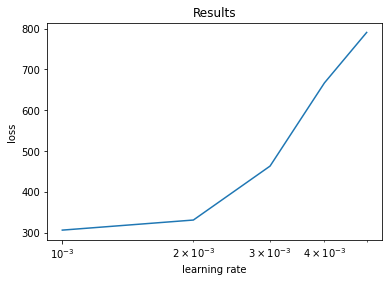

In [15]:
plt.plot(alphas,res_loss)
plt.title("Test Results")
plt.ylabel("loss")
plt.xlabel("learning rate")
plt.xscale("log")
plt.show()

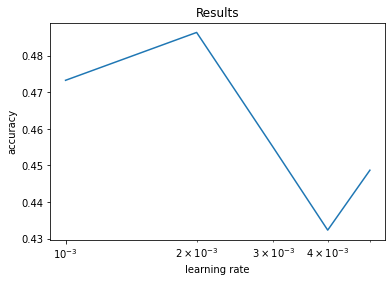

In [16]:
plt.plot(alphas,res_acc)
plt.title("Test Results")
plt.ylabel("accuracy")
plt.xlabel("learning rate")
plt.xscale("log")
plt.show()

Increaing the learning rate from 0.001 to 0.005 improved the accuracy up to some value, then the accuracy got worse. The loss, on the other hand, kept up increasing. 

### What is the effect of batch size on the training process? Which performed best?

In [17]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

n = 5
res_loss2 = np.zeros(n)
res_acc2 = np.zeros(n)
batchs = np.zeros(n)

for i in range(n):
    batch = 20*(i+1)
    batchs[i] = batch
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    # Train the model.
    model.fit(x_train, y_train, batch_size=batch,epochs=25, callbacks=[tensorboard_callback])
    # Evaluate
    score = model.evaluate(x_test, y_test)
    res_loss2[i] = score[0]
    res_acc2[i] = score[1]

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6959 - accuracy: 0.7559
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6791 - accuracy: 0.7562
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6624 - accuracy: 0.7621
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6567 - accuracy: 0.7628
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6386 - accuracy: 0.7716
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6194 - accuracy: 0.7757
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6140 - accuracy: 0.7782
Epoch 8/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6021 - accuracy: 0.7824
Epoch 9/25
2500/2500 [==============================] - 6s 3ms/step - loss: 0.5888 - accuracy: 0.7876
Epoch 10/25
2500/2500 [==============================] - 6s 3ms/step - loss: 0.576

625/625 [==============================] - 3s 5ms/step - loss: 0.1012 - accuracy: 0.9670
Epoch 4/25
625/625 [==============================] - 3s 5ms/step - loss: 0.0850 - accuracy: 0.9705
Epoch 5/25
625/625 [==============================] - 3s 5ms/step - loss: 0.0936 - accuracy: 0.9671
Epoch 6/25
625/625 [==============================] - 3s 5ms/step - loss: 0.0937 - accuracy: 0.9674
Epoch 7/25
625/625 [==============================] - 3s 5ms/step - loss: 0.0712 - accuracy: 0.9746
Epoch 8/25
625/625 [==============================] - 3s 5ms/step - loss: 0.0832 - accuracy: 0.9709
Epoch 9/25
625/625 [==============================] - 3s 5ms/step - loss: 0.0952 - accuracy: 0.9670
Epoch 10/25
625/625 [==============================] - 3s 5ms/step - loss: 0.0648 - accuracy: 0.9772
Epoch 11/25
625/625 [==============================] - 3s 5ms/step - loss: 0.0836 - accuracy: 0.9713
Epoch 12/25
625/625 [==============================] - 3s 5ms/step - loss: 0.1054 - accuracy: 0.9642
Epoch 13

Text(0.5, 0, 'batch size')

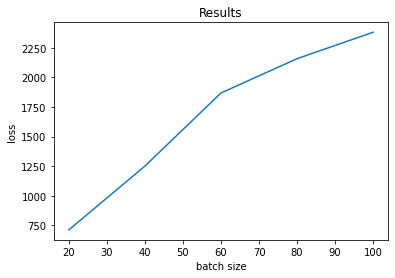

In [19]:
plt.plot(batchs,res_loss2)
plt.title("Results")
plt.ylabel("loss")
plt.xlabel("batch size")

Text(0.5, 0, 'batch size')

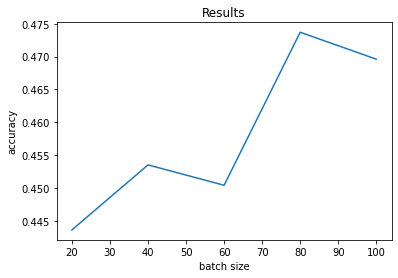

In [20]:
plt.plot(batchs,res_acc2)
plt.title("Results")
plt.ylabel("accuracy")
plt.xlabel("batch size")

### Try different hyperparameters to obtain the best accuracy on the test set. What is your best performance and what were the hyperparameters?

For a learning rate = 0.001, batch size = 128, the accuracy is 0.483. 

### Implement an equivalent feed forward network for the same task with each hidden layer containing the same number of neurons as the number of filters in each convolution layer. Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of 25 epochs. Compare its performance with your LeNet implementation based on the following questions: 

a. What is its performance?
b. How many parameters are there in this network compared to the LeNet
implementation? Are they worth it?

# Question 3





### What are the dimensions of the input and the kernel (or filter)? How many parameters are there in the kernel f?



In [8]:
# Input 
matrix = np.array([[7,5,0,0,3,2],[6,4,5,1,4,8],[9,0,2,2,5,4],[6,3,4,7,9,8],[5,7,5,6,9,0],[7,9,0,8,2,3]])
W1,H1 = np.shape(matrix)
C = 1
print("Depth of input/kernel:", C)

# filter
kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
F = np.shape(kernel)[0]

print("Input dimensions: ",np.shape(matrix))
print("Kernel dimensions: ",np.shape(kernel))

##Parameters in kernel 
par = F*F*C + 1
print("Parameters in kernel: ",par)

Depth of input/kernel: 1
Input dimensions:  (6, 6)
Kernel dimensions:  (3, 3)
Parameters in kernel:  10


### What is the output activation map when you apply the convolutional operation using the filter f on the input X without padding?

In [9]:
## stride and padding
S, P = (1,0)
W2 = (W1-F+2*P)/S + 1
H2 = (H1-F+2*P)/S + 1
out_dim = (W2,H2,C)

print("Output dimensions:",out_dim)

#convolutional layer
def conv2d(mat, krn):

    is0, is1, ks0, ks1 = *mat.shape, *krn.shape
    rs0, rs1 = is0 - ks0 + 1, is1 - ks1 + 1
    res = np.zeros((rs0, rs1), dtype = krn.dtype)
    
    for i in range(rs0):
        for j in range(rs1):
            res[i, j] = (krn * mat[i : i + ks0, j : j + ks1]).sum()
            
    return res
##output    
output = conv2d(matrix,kernel)
print("Output: ",output)

Output dimensions: (4.0, 4.0, 1)
Output:  [[ 16   9  -4 -18]
 [ 17  -5 -10 -12]
 [ 11  -9 -17   2]
 [  9  -1 -15  16]]


### What is the output when you apply a max-pooling operation on the output from the previous question?

In [11]:
import skimage.measure
## Using a 2x2 filter with stride 2
max_pool_out = skimage.measure.block_reduce(output, (2,2), np.max)
print("Max pooling output: ",max_pool_out)

Max pooling output:  [[17 -4]
 [11 16]]
